# Analysis of COVID-19 Cases in the world

Some requirements:

- ~~Convert data into tidy format~~
- ~~Export to normalized tables in SQLite3 Database~~
- Use SQL statements (from within pandas) to retrieve data needed for each visualization

### Visualization 3:
#### Does a higher GDP/Capita means there is less lower death percentage of the population?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Connecting database using SQLite3

conn = sqlite3.connect("../database/data.db")
cur = conn.cursor()

In [9]:
smalltable3_create = '''CREATE TABLE SMALLTABLE3 AS SELECT COUNTRY, `GDP/Capita`, Population, SUM(Deaths) AS `Total Deaths`, SUM(Deaths) / Population * 100 AS '% Death' FROM covidstats GROUP BY COUNTRY'''
smalltable3_read = '''SELECT * FROM SMALLTABLE3'''

cur.execute(smalltable3_create)
smalltable3 = pd.read_sql_query(smalltable3_read, conn)
smalltable3

,Country,GDP/Capita,Population,Total Deaths,% Death
0,Albania,5353.2,2873457,171892.0,5.982063
1,Algeria,3974.0,41318142,547843.0,1.325914
2,Argentina,9912.3,44271041,6622663.0,14.959357
3,Armenia,4622.7,2930450,428678.0,14.628402
4,Australia,55060.3,24598933,186575.0,0.758468
...,...,...,...,...,...
99,United States,65297.5,325719178,73071478.0,22.433889
100,Uruguay,16190.1,3456750,36814.0,1.064989
101,Vietnam,2715.3,95540800,6973.0,0.007298
102,Zambia,1305.1,17094130,96458.0,0.564276


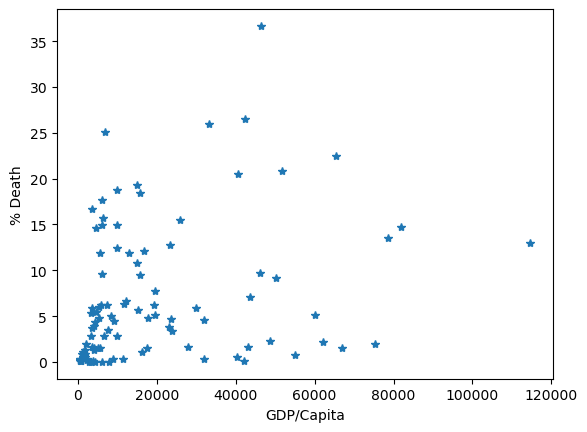

In [10]:
x = smalltable3['GDP/Capita']
y = smalltable3['% Death']
plt.xlabel("GDP/Capita")
plt.ylabel("% Death")
plt.plot(x, y, '*')

### Conclusion

- There is no correlation between having a higher GDP/Capita in a country would mean there is a smaller death rate in the country due to COVID